# BLINKIT (Data Analysis)

In [4]:
# Import Libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [16]:
# Import Raw Data

df = pd.read_csv(r"C:\Users\nikhi\PycharmProjects\Personal_Python_Projects\BlinkIt_DataAnalysis\BlinkITGroceryData_csv.csv")

In [17]:
# Sample Data

df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [18]:
# Sample Data

df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [15]:
# Size of the Data

print('Size of data: ',df.shape)

Size of data:  (8523, 12)


In [19]:
# Field Info

df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

In [23]:
# Data Types

df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Total Sales                  float64
Rating                       float64
dtype: object

In [29]:
# Missing Values

df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Total Sales                     0
Rating                          0
dtype: int64

### Data Cleaning

In [24]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [26]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat',
                                                         'low fat': 'Low Fat',
                                                         'reg': 'Regular'})

print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### KPI Requirements

In [34]:
 # Total Sales
total_sales = df['Total Sales'].sum()

# Average Sales
avg_sales = df['Total Sales'].mean()

# No of Items Sold
no_of_items_sold = df['Total Sales'].count()

# Average Ratings
avg_ratings = df['Rating'].mean()

# Display
print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.0f}")
print(f"No of Items Sold: {no_of_items_sold:,.0f}")
print(f"Average Ratings: {avg_ratings:,.2f}")

Total Sales: $1,201,681
Average Sales: $141
No of Items Sold: 8,523
Average Ratings: 3.97


## GRAPH CHARTS

### Total sales (in terms of Fat Content)

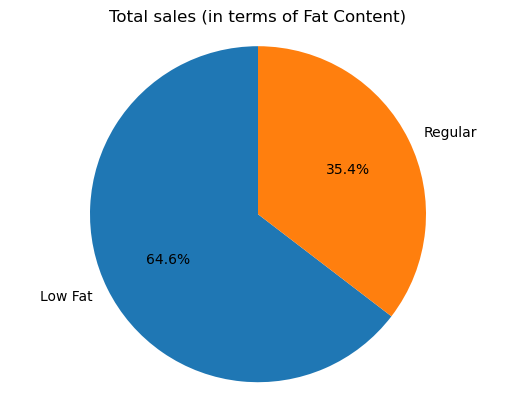

In [39]:
sales_by_fat = df.groupby('Item Fat Content')['Total Sales'].sum()

plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%1.1f%%', startangle=90)

plt.title('Total sales (in terms of Fat Content)')
plt.axis('equal')
plt.show()

### Total sales (in terms of Item Type)

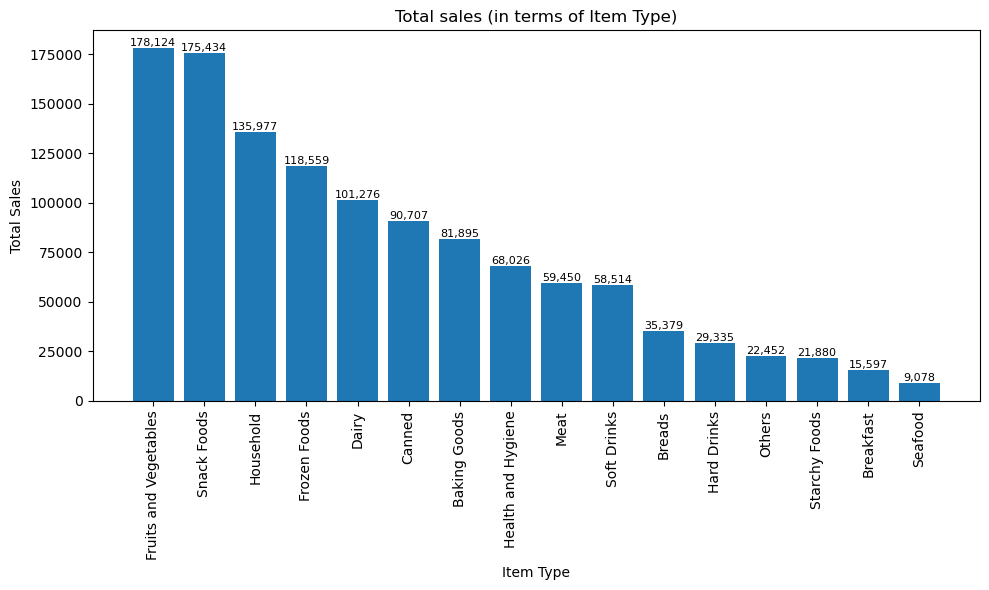

In [40]:
sales_by_type = df.groupby('Item Type')['Total Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total sales (in terms of Item Type)')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### Fat Content Sales of Outlet Location Types

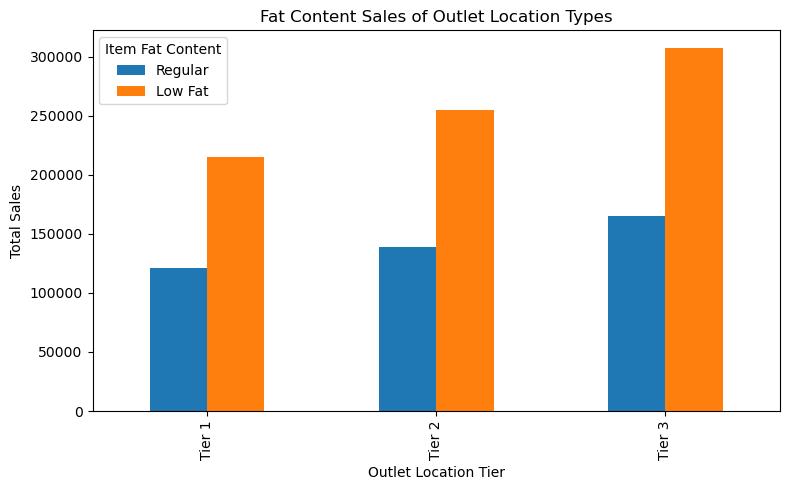

In [42]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Total Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8, 5), title='Fat Content Sales of Outlet Location Types')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

### Total sales (in terms of Outlet Establishments)

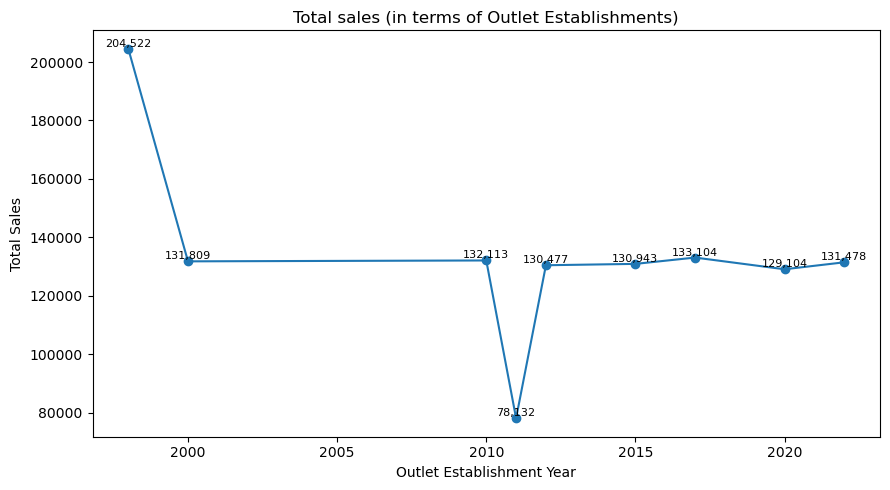

In [45]:
sales_by_year = df.groupby('Outlet Establishment Year')['Total Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total sales (in terms of Outlet Establishments)')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### Total sales (in terms of Outlet Size)

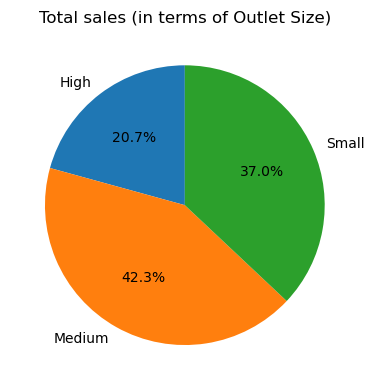

In [48]:
sales_by_size = df.groupby('Outlet Size')['Total Sales'].sum()

plt.figure(figsize=(4, 4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Total sales (in terms of Outlet Size)')
plt.tight_layout()
plt.show()

### Total sales (in terms of Outlet Location Type)

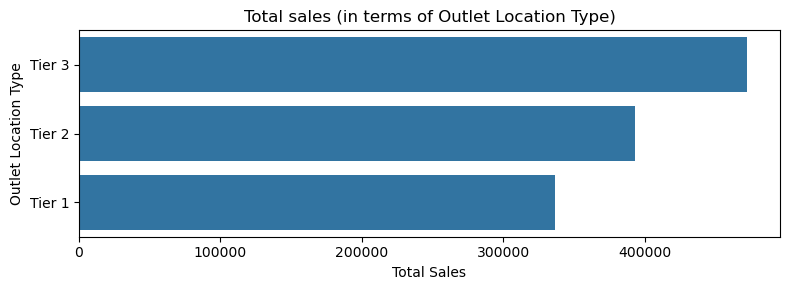

In [53]:
sales_by_location = df.groupby('Outlet Location Type')['Total Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Total Sales', ascending=False)

plt.figure(figsize=(8, 3))
ax = sns.barplot(x='Total Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total sales (in terms of Outlet Location Type)')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()